In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
X = pd.read_csv('train.csv')
y = X.pop('outcome')

In [11]:
X.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no


In [14]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=.8, random_state=42)

X_train.shape, X_validation.shape

((247, 28), (988, 28))

In [15]:
numerical_features = X_train.select_dtypes(include=[np.number])    
categorical_features = X_train.select_dtypes(include=['object', 'category'])

In [17]:
# Compute the correation matrix for numerical features
corr_matrix = X_train[numerical_features.columns].corr()

corr_matrix

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
id,1.000000,0.062877,0.031588,0.021523,-0.025941,-0.063411,0.088828,0.089305,-0.021829,0.068174,0.033136,0.008099
hospital_number,0.062877,1.000000,0.070670,0.207437,0.059661,0.179796,0.026652,-0.175145,0.227207,-0.028897,-0.024405,-0.018527
rectal_temp,0.031588,0.070670,1.000000,0.086899,0.067022,-0.015616,0.162020,0.002770,-0.006168,0.034226,-0.002308,-0.006815
pulse,0.021523,0.207437,0.086899,1.000000,0.418540,-0.066937,0.454216,0.018537,0.035821,0.105140,0.033497,0.077381
respiratory_rate,-0.025941,0.059661,0.067022,0.418540,1.000000,0.031120,0.120666,-0.050109,0.093226,0.021668,0.022618,0.047921
nasogastric_reflux_ph,-0.063411,0.179796,-0.015616,-0.066937,0.031120,1.000000,-0.194506,-0.632778,0.529289,0.079290,-0.026682,0.004683
packed_cell_volume,0.088828,0.026652,0.162020,0.454216,0.120666,-0.194506,1.000000,0.168875,-0.082701,-0.014563,0.074840,0.072164
total_protein,0.089305,-0.175145,0.002770,0.018537,-0.050109,-0.632778,0.168875,1.000000,-0.503836,-0.105365,0.010112,-0.040916
abdomo_protein,-0.021829,0.227207,-0.006168,0.035821,0.093226,0.529289,-0.082701,-0.503836,1.000000,0.065983,-0.034347,-0.016101
lesion_1,0.068174,-0.028897,0.034226,0.105140,0.021668,0.079290,-0.014563,-0.105365,0.065983,1.000000,-0.005999,0.002167


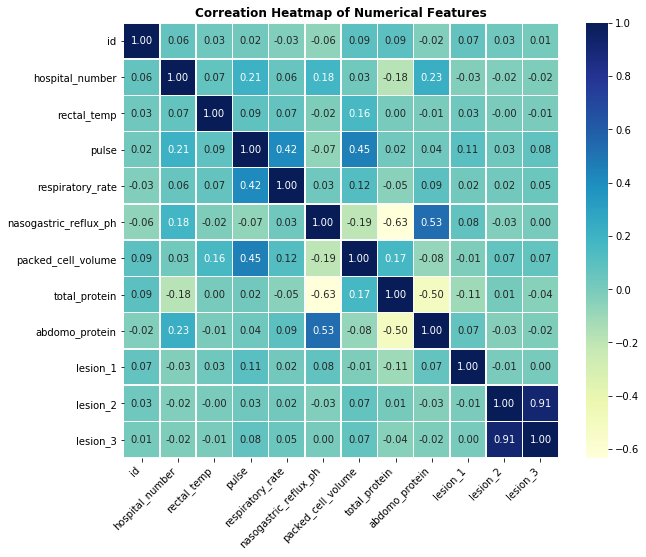

In [20]:
mask = np.triu(corr_matrix)

# Without mask

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidth=0.5, square=True, linecolor='#fafafa', fmt=".2f")

# Set the plot title
plt.title('Correation Heatmap of Numerical Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()

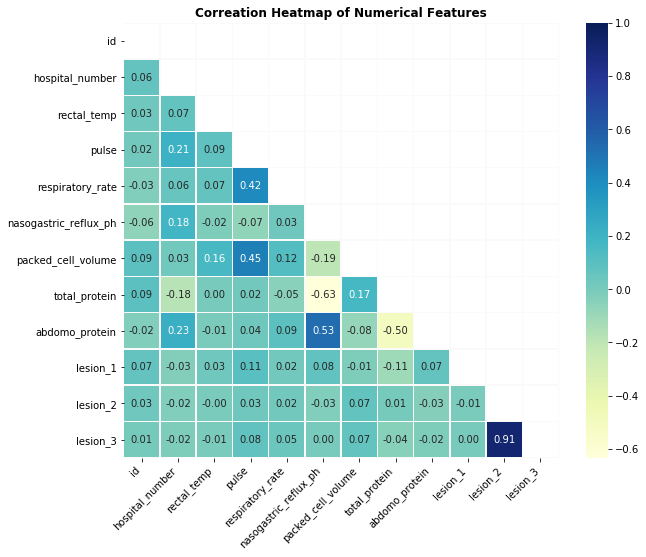

In [21]:
mask = np.triu(corr_matrix)

# With mask

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu',  mask=mask, linewidth=0.5, square=True, linecolor='#fafafa', fmt=".2f")

# Set the plot title
plt.title('Correation Heatmap of Numerical Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()

In [24]:
def correlation(dataset, threshould):
    col_arr = set()
    corr_martix = dataset.corr()
    
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshould:
                colName = corr_matrix.columns[i]
                col_arr.add(colName)
                
    return col_arr              

In [26]:
correlation(X_train, 0.5)

{'abdomo_protein', 'lesion_3', 'total_protein'}